In [14]:
# 自定义绘制ks曲线的函数
def plot_ks(y_test, y_score, positive_flag):
    # 对y_test,y_score重新设置索引
    y_test.index = np.arange(len(y_test))
    #y_score.index = np.arange(len(y_score))
    # 构建目标数据集
    target_data = pd.DataFrame({'y_test':y_test, 'y_score':y_score})
    # 按y_score降序排列
    target_data.sort_values(by = 'y_score', ascending = False, inplace = True)
    # 自定义分位点
    cuts = np.arange(0.1,1,0.1)
    # 计算各分位点对应的Score值
    index = len(target_data.y_score)*cuts
    scores = target_data.y_score.iloc[index.astype('int')]
    # 根据不同的Score值，计算Sensitivity和Specificity
    Sensitivity = []
    Specificity = []
    for score in scores:
        # 正例覆盖样本数量与实际正例样本量
        positive_recall = target_data.loc[(target_data.y_test == positive_flag) & (target_data.y_score>score),:].shape[0]
        positive = sum(target_data.y_test == positive_flag)
        # 负例覆盖样本数量与实际负例样本量
        negative_recall = target_data.loc[(target_data.y_test != positive_flag) & (target_data.y_score<=score),:].shape[0]
        negative = sum(target_data.y_test != positive_flag)
        Sensitivity.append(positive_recall/positive)
        Specificity.append(negative_recall/negative)
    # 构建绘图数据
    plot_data = pd.DataFrame({'cuts':cuts,'y1':1-np.array(Specificity),'y2':np.array(Sensitivity), 
                              'ks':np.array(Sensitivity)-(1-np.array(Specificity))})
    # 寻找Sensitivity和1-Specificity之差的最大值索引
    max_ks_index = np.argmax(plot_data.ks)
    plt.plot([0]+cuts.tolist()+[1], [0]+plot_data.y1.tolist()+[1], label = '1-Specificity')
    plt.plot([0]+cuts.tolist()+[1], [0]+plot_data.y2.tolist()+[1], label = 'Sensitivity')
    # 添加参考线
    plt.vlines(plot_data.cuts[max_ks_index], ymin = plot_data.y1[max_ks_index], 
               ymax = plot_data.y2[max_ks_index], linestyles = '--')
    # 添加文本信息
    plt.text(x = plot_data.cuts[max_ks_index]+0.01,
             y = plot_data.y1[max_ks_index]+plot_data.ks[max_ks_index]/2,
             s = 'KS= %.2f' %plot_data.ks[max_ks_index])
    # 显示图例
    plt.legend()
    # 显示图形
    plt.show()

In [11]:
# 导入所需要的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
virtual_data = pd.read_excel('virtual_data.xlsx')

In [9]:
# 查看数据前5行
virtual_data.head()

,ID,Class,Score
0,1,P,0.55
1,2,P,0.87
2,3,P,0.23
3,4,P,0.61
4,5,P,0.75


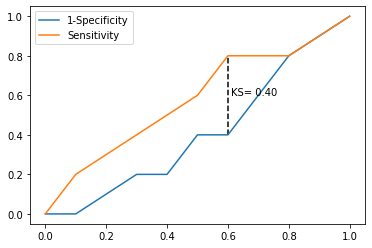

In [16]:
plot_ks(y_test = virtual_data.Class, y_score = virtual_data.Score, positive_flag = 'P')

In [35]:
# 导入所需要的模块
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection

In [20]:
# 读取数据
sports = pd.read_csv("Run or Walk.csv")

In [21]:
# 查看前五行数据
sports.head()

,date,time,username,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017/6/30,13:51:15:847724020,viktor,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017/6/30,13:51:16:246945023,viktor,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017/6/30,13:51:16:446233987,viktor,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017/6/30,13:51:16:646117985,viktor,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017/6/30,13:51:16:846738994,viktor,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [22]:
# 提取自变量名称
predictors = sports.columns[4:]

In [26]:
# 构建自变量矩阵
X = sports.loc[:,predictors]

In [27]:
X.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [28]:
# 提取因变量y
y = sports.activity

In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [36]:
# 将数据集拆分为训练集和测集
X_train, X_test, y_train, t_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [44]:
# 利用训练集进行建模
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# 查看返回的模型的各个参数
print(sklearn_logistic.intercept_, sklearn_logistic.coef_)

[4.36637441] [[ 0.48695898  6.87517973 -2.44872468 -0.01385936 -0.16085022  0.13389695]]
